In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns  # Import seaborn for violin plot

# Create a pandas dataframe from the data dictionary
data = pd.DataFrame({
    "Provinces": ['WC', 'EC', 'NC', 'FS', 'KZN', 'NW', 'GP', 'MP', 'LP'],
    "Taxi (No in Thousands)": [968, 1011, 123, 382, 1848, 585, 3780, 775, 1240],
    "Bus (No in Thousands)": [242, 117, 38, 72, 351, 125, 430, 294, 217],
    "Train (No in Thousands)": [74, 12, 0, 0, 32, 0, 181, 4, 0]
})


In [21]:
# Total Public Transport Users by Province
data["Total Public Transport Users"] = data["Taxi (No in Thousands)"] + data["Bus (No in Thousands)"] + data["Train (No in Thousands)"]

# Find the province with the most public transport users
most_public_transport_users = data["Total Public Transport Users"].idxmax()
province_with_most_public_transport_users = data["Provinces"][most_public_transport_users]
number_of_users = data["Total Public Transport Users"].max()

# Find the province with the least public transport users
least_public_transport_users = data["Total Public Transport Users"].idxmin()
province_with_least_public_transport_users = data["Provinces"][least_public_transport_users]

In [22]:
# Descriptive statistics for Public Transport Users
print("Public Transport Users by Province (in Thousands):")
print(data[["Provinces", "Total Public Transport Users"]])

print(f"\nProvince with the most public transport users: {province_with_most_public_transport_users} ({number_of_users:,.0f} thousand)")
print(f"Province with the least public transport users: {province_with_least_public_transport_users} ({data['Total Public Transport Users'].min():,.0f} thousand)")

Public Transport Users by Province (in Thousands):
  Provinces  Total Public Transport Users
0        WC                          1284
1        EC                          1140
2        NC                           161
3        FS                           454
4       KZN                          2231
5        NW                           710
6        GP                          4391
7        MP                          1073
8        LP                          1457

Province with the most public transport users: GP (4,391 thousand)
Province with the least public transport users: NC (161 thousand)


In [23]:
# Calculate descriptive statistics for Public Transport Users
print("Public Transport Users Descriptive Statistics (in Thousands):")
for col in data.iloc[:, 1:]:  # Iterate through public transport columns (excluding Provinces)
    # Calculate statistics using functions from pandas and scipy
    mean = data[col].mean()
    std_err = data[col].sem()  # Standard Error
    median = data[col].median()
    mode, _ = stats.mode(data[col])  # Mode (using scipy)
    std_dev = data[col].std()
    sample_var = data[col].var()
    range_val = data[col].max() - data[col].min()
    skewness = stats.skew(data[col])  # Calculate skewness
    
    # Print formatted output
    print(f"\n - {col}:")
    print(f"   Mean: {mean:.2f}")
    print(f"   Standard Error: {std_err:.2f}")
    print(f"   Median: {median:.2f}")
    print(f"   Mode: {mode[0]:.2f}")  # Accessing first element of mode tuple
    print(f"   Standard Deviation: {std_dev:.2f}")
    print(f"   Sample Variance: {sample_var:.2f}")
    print(f"   Range: {range_val:.2f}")
    print(f"   Skewness: {skewness:.2f}")

Public Transport Users Descriptive Statistics (in Thousands):

 - Taxi (No in Thousands):
   Mean: 1190.22
   Standard Error: 364.28
   Median: 968.00
   Mode: 123.00
   Standard Deviation: 1092.85
   Sample Variance: 1194311.44
   Range: 3657.00
   Skewness: 1.58

 - Bus (No in Thousands):
   Mean: 209.56
   Standard Error: 44.24
   Median: 217.00
   Mode: 38.00
   Standard Deviation: 132.72
   Sample Variance: 17613.78
   Range: 392.00
   Skewness: 0.29

 - Train (No in Thousands):
   Mean: 33.67
   Standard Error: 20.15
   Median: 4.00
   Mode: 0.00
   Standard Deviation: 60.44
   Sample Variance: 3652.50
   Range: 181.00
   Skewness: 1.85

 - Total Public Transport Users:
   Mean: 1433.44
   Standard Error: 420.38
   Median: 1140.00
   Mode: 161.00
   Standard Deviation: 1261.15
   Sample Variance: 1590493.28
   Range: 4230.00
   Skewness: 1.52


C:\Users\User\AppData\Local\Temp\ipykernel_17436\3318390876.py:8: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(data[col])  # Mode (using scipy)


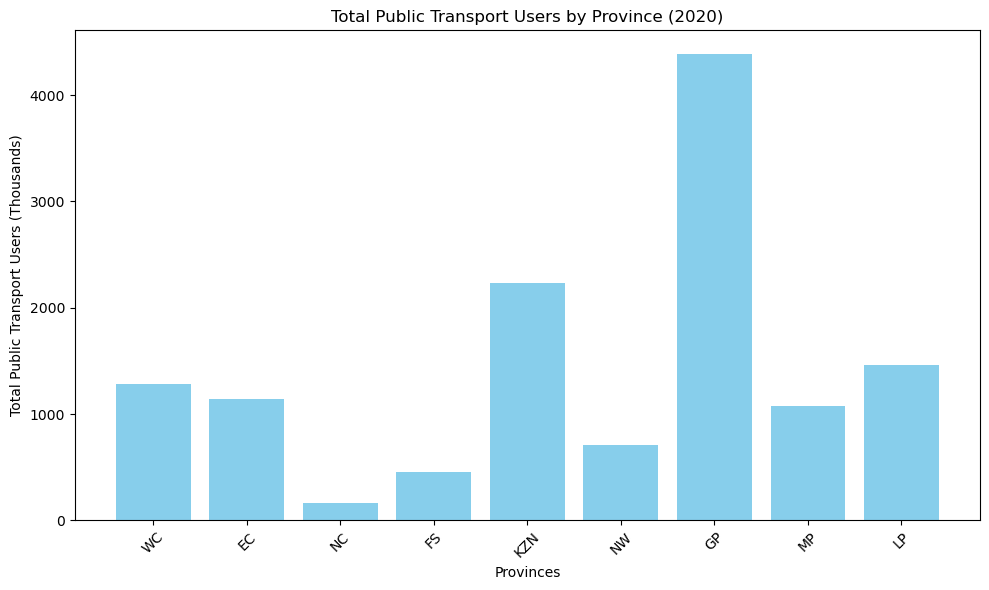

In [24]:
# Plot - Total Public Transport Users by Province
plt.figure(figsize=(10, 6))
plt.bar(data["Provinces"], data["Total Public Transport Users"], color= 'skyblue')
plt.xlabel("Provinces")
plt.ylabel("Total Public Transport Users (Thousands)")
plt.title("Total Public Transport Users by Province (2020)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

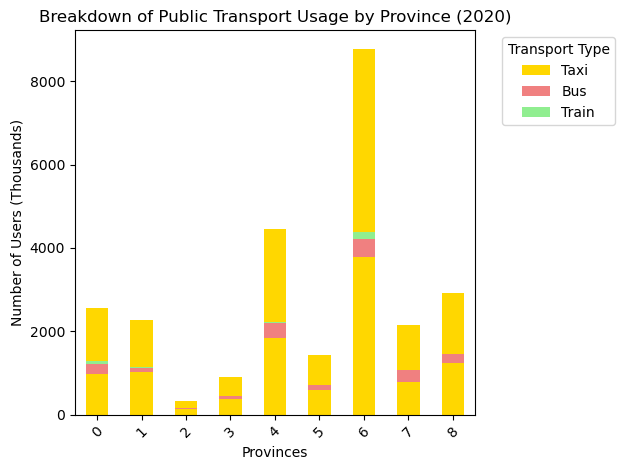

In [25]:
# Plot - Breakdown of Public Transport Usage by Province (Stacked Bar Chart)
transport_types = ["Taxi", "Bus", "Train"]
plt.figure(figsize=(12, 6))
data.iloc[:, 1:].plot(kind="bar", stacked=True, color=['gold', 'lightcoral', 'lightgreen'])
plt.xlabel("Provinces")
plt.ylabel("Number of Users (Thousands)")
plt.title("Breakdown of Public Transport Usage by Province (2020)")
plt.xticks(rotation=45)
plt.legend(title="Transport Type", labels=transport_types, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

In [29]:
# Reflection
print("Reflection\nThe biggest difference with doing this analysis with excel as opposed to python programming IDE is the feel\n of the different tools that clearly shows that one is build for eliminating repeating manual tasks because python has advanced libraries you don't have to employ any manual strenghth to execute a task that is repatative this makes it faster and more convinient to use,\n and also the lag on the exel in executing commands reveals the defference. This data shows inngauteng there is more communotors and it eludes tho the skeweness of resources betweeen the provinces as it shows that the population in gauteng is more large even though its the smallest province of the country and high lights the problem that citizens have migrated to the city because there must be more businesses based here does more work oppotunities. with this conclusion you can also deduce that there must be less number of businesses as it relates to the number of commutors in each provinces because if there is less need for the public transport in means less people are going to work or they have migrated out of the provice because there is less opportunities. As the graph shows that NW is the least that has a number of commutors.\n ")

Reflection
The biggest difference with doing this analysis with excel as opposed to python programming IDE is the feel
 of the different tools that clearly shows that one is build for eliminating repeating manual tasks because python has advanced libraries you don't have to employ any manual strenghth to execute a task that is repatative this makes it faster and more convinient to use,
 and also the lag on the exel in executing commands reveals the defference. This data shows inngauteng there is more communotors and it eludes tho the skeweness of resources betweeen the provinces as it shows that the population in gauteng is more large even though its the smallest province of the country and high lights the problem that citizens have migrated to the city because there must be more businesses based here does more work oppotunities. with this conclusion you can also deduce that there must be less number of businesses as it relates to the number of commutors in each provinces because if th